<a href="https://colab.research.google.com/github/r197972x/assignment/blob/main/Copy_of_Copy_of_Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [9]:
# Dataset is now stored in a Pandas Dataframe
 
import pandas as pd
data_frame = pd.read_csv('/content/gdrive/My Drive/datasets_13996_18858_WA_Fn-UseC_-Telco-Customer-Churn.csv')




In [10]:
data_frame

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [ ]:
dataf = data_frame.loc[:,['gender','SeniorCitizen','Partner','Dependents','tenure','PhoneService','PaperlessBilling','MonthlyCharges','Churn','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract', 'PaymentMethod']]

In [ ]:
dataf

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,Churn,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod
0,Female,0,Yes,No,1,No,Yes,29.85,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Electronic check
1,Male,0,No,No,34,Yes,No,56.95,No,No,DSL,Yes,No,Yes,No,No,No,One year,Mailed check
2,Male,0,No,No,2,Yes,Yes,53.85,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Mailed check
3,Male,0,No,No,45,No,No,42.30,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,Bank transfer (automatic)
4,Female,0,No,No,2,Yes,Yes,70.70,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Electronic check
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,84.80,No,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Mailed check
7039,Female,0,Yes,Yes,72,Yes,Yes,103.20,No,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Credit card (automatic)
7040,Female,0,Yes,Yes,11,No,Yes,29.60,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Electronic check
7041,Male,1,Yes,No,4,Yes,Yes,74.40,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Mailed check


In [ ]:
 dataf.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
PaperlessBilling    0
MonthlyCharges      0
Churn               0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaymentMethod       0
dtype: int64

In [ ]:
# data_frame.drop(columns='customerID')

In [ ]:
from numpy import array
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
features_le = ['gender','Partner','Dependents','PhoneService','PaperlessBilling']
def label_encoding(features,dataf):
  for u in features :
    dataf[u]=dataf[u].map({'Yes':1,'No':0})
    return

label_encoding(['Partner','Dependents','PhoneService','PaperlessBilling'],dataf)
dataf['gender']=dataf['gender'].map({'Female':1, 'Male':0})
dataf['Dependents']=dataf['Dependents'].map({'Yes':1,'No':0})
dataf['PhoneService']=dataf['PhoneService'].map({'Yes':1,'No':0})
dataf['PaperlessBilling']=dataf['PaperlessBilling'].map({'Yes':1,'No':0})
dataf['Churn']=dataf['Churn'].map({'Yes':1, 'No':0})

In [ ]:
dataf

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,Churn,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod
0,1,0,1,0,1,0,1,29.85,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Electronic check
1,0,0,0,0,34,1,0,56.95,0,No,DSL,Yes,No,Yes,No,No,No,One year,Mailed check
2,0,0,0,0,2,1,1,53.85,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Mailed check
3,0,0,0,0,45,0,0,42.30,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,Bank transfer (automatic)
4,1,0,0,0,2,1,1,70.70,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Electronic check
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,1,84.80,0,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Mailed check
7039,1,0,1,1,72,1,1,103.20,0,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Credit card (automatic)
7040,1,0,1,1,11,0,1,29.60,0,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Electronic check
7041,0,1,1,0,4,1,1,74.40,1,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Mailed check


In [ ]:
features_ohe = ['MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaymentMethod']
dataf = pd.get_dummies(dataf, columns=features_ohe)

In [ ]:
dataf

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,1,29.85,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,56.95,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,1,53.85,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,42.30,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,1,70.70,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,1,84.80,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1
7039,1,0,1,1,72,1,1,103.20,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0
7040,1,0,1,1,11,0,1,29.60,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
7041,0,1,1,0,4,1,1,74.40,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1


<Figure size 1152x720 with 0 Axes>

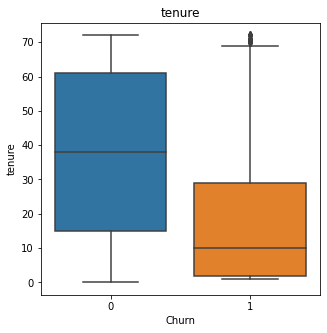

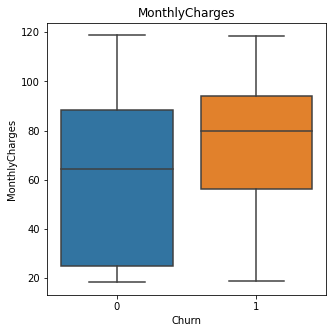

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
plt.figure(figsize=(16,10))
plots = {1:[111], 2:[121,122], 3:[131,132,133], 4:[221,222,223,224],5: [231,232,233,234,235],6:[231,232,233,234,235,236]}
def boxplot(x,y,df):
  rows = int(str(plots[len(y)][0])[0])
  columns= int(str(plots[len(y)][0])[1])
  plt.figure(figsize=(5*columns,5*rows))

  for i,j in enumerate(y):
    plt.subplot(plots[len(y)][i])
    ax = sns.boxplot(x=x,y=j,data=dataf[[x,j]])
    ax.set_title(j)
    return plt.show()


boxplot("Churn",['tenure'],dataf)
boxplot("Churn",['MonthlyCharges'],dataf)



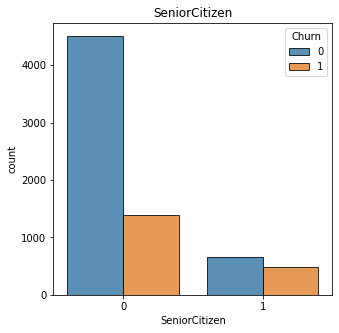

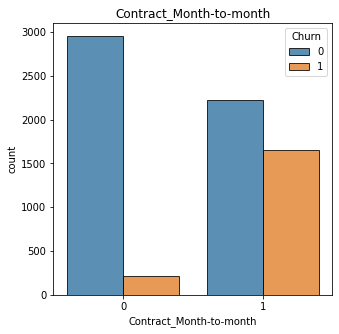

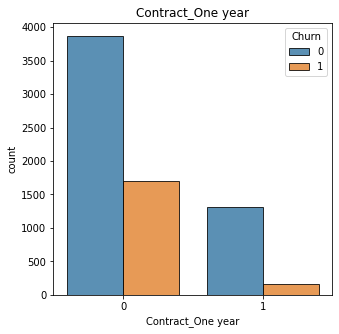

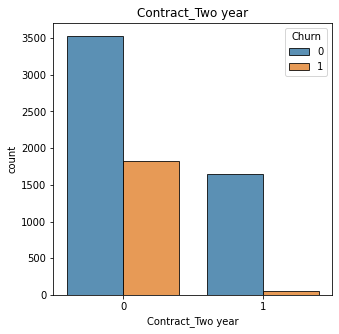

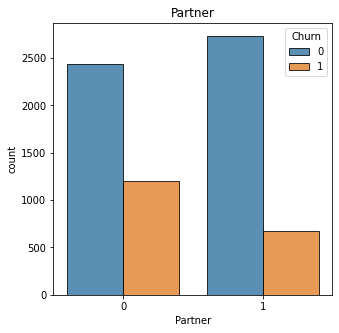

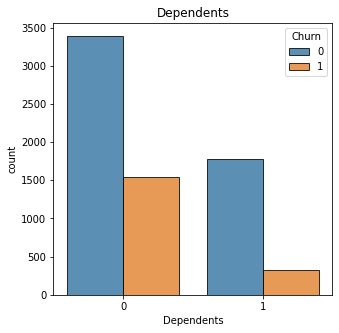

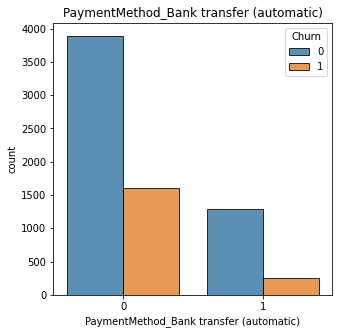

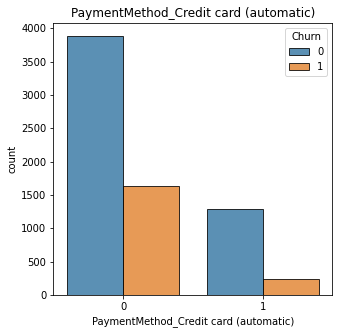

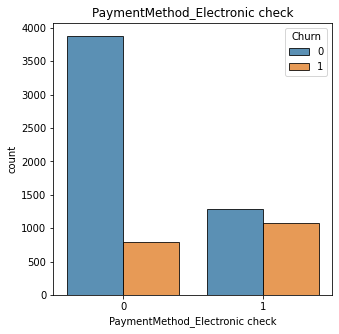

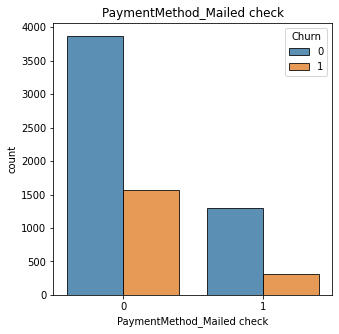

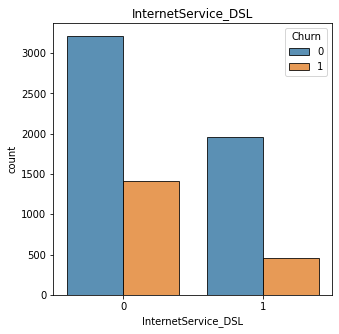

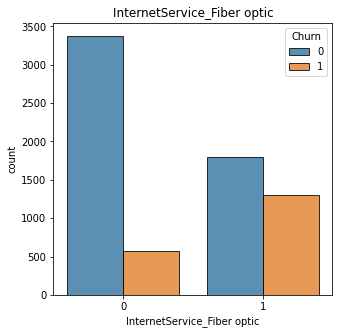

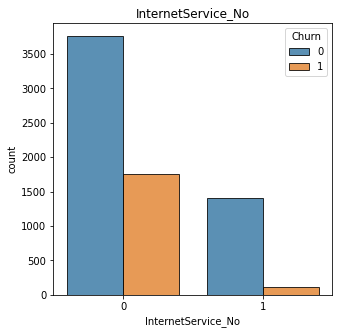

In [ ]:
def countplot(x,y,df):
  rows = int(str(plots[len(y)][0])[0])
  columns= int(str(plots[len(y)][0])[1])
  
  plt.figure(figsize=(5*columns,5*rows))

  for i,j in enumerate(y):
    plt.subplot(plots[len(y)][i])
    ax = sns.countplot(x=j,hue=x,data=dataf,alpha=0.8, linewidth=1, edgecolor='black')
    ax.set_title(j)
    return plt.show()
countplot("Churn",['SeniorCitizen'], dataf)
countplot("Churn",['Contract_Month-to-month'], dataf)
countplot("Churn",['Contract_One year'], dataf)
countplot("Churn",['Contract_Two year'], dataf)
countplot("Churn",['Partner'], dataf)
countplot("Churn",['Dependents'], dataf)
countplot("Churn",['PaymentMethod_Bank transfer (automatic)'], data_frame)
countplot("Churn",['PaymentMethod_Credit card (automatic)'], data_frame)
countplot("Churn",['PaymentMethod_Electronic check'], data_frame)
countplot("Churn",['PaymentMethod_Mailed check'], data_frame)
countplot("Churn",['InternetService_DSL'], data_frame)
countplot("Churn",['InternetService_Fiber optic'], data_frame)
countplot("Churn",['InternetService_No'], data_frame)


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb

from sklearn.model_selection import train_test_split
# Create arrays for the features and the target: X, y
X, y = dataf.iloc[:, :-1], dataf.iloc[:, -1]
# Create the training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
# Instantiate the XGBClassifier: xg_cl
xg_cl = xgb.XGBClassifier(objective='binary:logistic', n_estimators=10, seed=123)

# Fit the classifier to the training set
xg_cl.fit(X_train, y_train)

# Predict the labels of the test set: preds
preds = xg_cl.predict(X_test)
# Compute the accuracy: accuracy
accuracy = float(np.sum(preds == y_test)) / y_test.shape[0]
print("accuracy: %f" % (accuracy))

accuracy: 1.000000


In [ ]:
# Create the DMatrix from X and y: datafmatrix
datafmatrix = xgb.DMatrix(data=X, label=y)

# Create the parameter dictionary: params
params = {'objective':"reg:logistic", "max_depth":5}

# Perform cross-validation: cv_results
cv_results = xgb.cv(dtrain=datafmatrix, params=params,
                   nfold=3, num_boost_round=5,
                   metrics="error", as_pandas=True, seed=123)

# Pint cv_results
print(cv_results)

# Print the accuracy
print(((1 - cv_results['test-error-mean']).iloc[-1]))

# Perform cross_validation: cv_results
cv_results = xgb.cv(dtrain=datafmatrix, params=params,
                    nfold=3, num_boost_round=5,
                    metrics="auc", as_pandas=True, seed=123)

# Print cv_results
print(cv_results)

# Print the AUC
print((cv_results["test-auc-mean"]).iloc[-1])

   train-error-mean  train-error-std  test-error-mean  test-error-std
0               0.0              0.0              0.0             0.0
1               0.0              0.0              0.0             0.0
2               0.0              0.0              0.0             0.0
3               0.0              0.0              0.0             0.0
4               0.0              0.0              0.0             0.0
1.0
   train-auc-mean  train-auc-std  test-auc-mean  test-auc-std
0             1.0            0.0            1.0           0.0
1             1.0            0.0            1.0           0.0
2             1.0            0.0            1.0           0.0
3             1.0            0.0            1.0           0.0
4             1.0            0.0            1.0           0.0
1.0
